In [251]:
import pandas as pd
import matplotlib.pyplot as plt



In [252]:
day_0 = pd.read_csv("prices_round_3_day_0.csv", sep=";")
day_1 = pd.read_csv("prices_round_3_day_1.csv", sep=";")
day_2 = pd.read_csv("prices_round_3_day_2.csv", sep=";")

all_days = pd.concat([day_0, day_1, day_2], ignore_index=True)
print(len(all_days.index))
all_days.head()

120000


,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,0,0,CHOCOLATE,7999,111,NaN,NaN,NaN,NaN,8001,111,NaN,NaN,NaN,NaN,8000.0,0.0
1,0,0,STRAWBERRIES,3999,210,NaN,NaN,NaN,NaN,4001,210,NaN,NaN,NaN,NaN,4000.0,0.0
2,0,0,ROSES,14999,72,NaN,NaN,NaN,NaN,15001,72,NaN,NaN,NaN,NaN,15000.0,0.0
3,0,0,GIFT_BASKET,71348,19,71347.0,24.0,NaN,NaN,71362,19,71363.0,24.0,NaN,NaN,71355.0,0.0
4,0,100,GIFT_BASKET,71344,1,71343.0,12.0,71342.0,20.0,71355,1,71356.0,12.0,71357.0,20.0,71349.5,0.0


In [253]:
choc_df = all_days[all_days["product"]=="CHOCOLATE"]
choc_df = choc_df.reset_index()
strawberry_df = all_days[all_days["product"]=="STRAWBERRIES"]
strawberry_df = strawberry_df.reset_index()
roses_df = all_days[all_days["product"]=="ROSES"]
roses_df = roses_df.reset_index()
gift_df = all_days[all_days["product"]=="GIFT_BASKET"]
gift_df = gift_df.reset_index()
print(len(choc_df.index))
# choc_df.head()
# strawberry_df.head()
# roses_df.head()
# gift_df.head()

30000


In [254]:
mid_prices = pd.DataFrame()
mid_prices["Chocolate"] = choc_df["mid_price"]
mid_prices["Strawberries"] = strawberry_df["mid_price"]
mid_prices["Roses"] = roses_df["mid_price"]
mid_prices["Gifts"] = gift_df["mid_price"]
mid_prices.corr()
# find that: 
# CHOCOLATE & GIFTS(1st) - 0.947, ROSES(2nd) - 0.826 have a STRONG correlation
# ROSES & GIFTS have a STRONG correlation (0.850)
# STRAWBERRIES & GIFTS have a MODERATE correlation (0.498)
# 
# Ideas:
# Strawberries appear to be relatively independent especially in comparison to chocolate and roses
# apart from gifts, all items are relatively independent of each other except for: chocolate & roses 

,Chocolate,Strawberries,Roses,Gifts
Chocolate,1.000000,0.273545,0.826358,0.947339
Strawberries,0.273545,1.000000,0.148667,0.498003
Roses,0.826358,0.148667,1.000000,0.850830
Gifts,0.947339,0.498003,0.850830,1.000000


In [255]:
mid_price_z = pd.DataFrame()
for col in mid_prices.columns:
    mid_price_z[col] = (mid_prices[col] - mid_prices[col].mean())/mid_prices[col].std()
mid_price_z.head()

,Chocolate,Strawberries,Roses,Gifts
0,0.852100,-0.979250,3.054712,1.076837
1,0.867199,-0.997494,3.054712,1.067672
2,0.862166,-0.997494,3.057810,1.063506
3,0.877265,-0.997494,3.054712,1.069339
4,0.872232,-0.997494,3.039225,1.054341


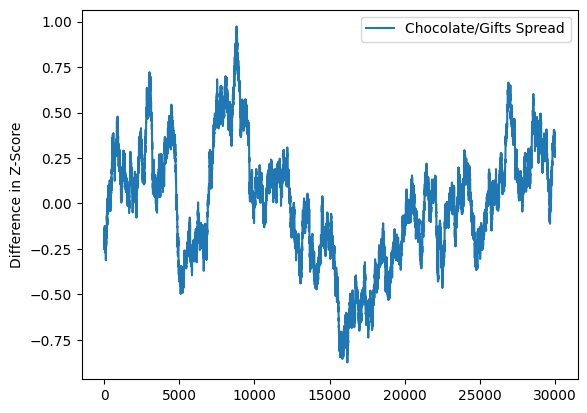

In [263]:
# Get chocolate and gift spread
plt.plot(mid_price_z["Chocolate"] - mid_price_z["Gifts"], label="Chocolate/Gifts Spread")
plt.ylabel("Difference in Z-Score")
plt.legend(loc="best")
plt.show()

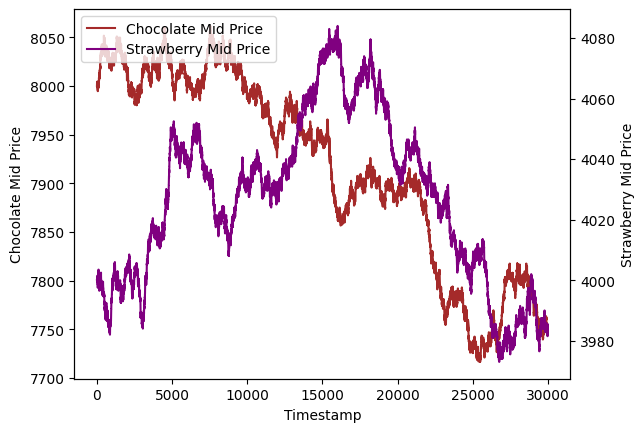

In [257]:
# CHOCOLATE & STRAWBERRIES
fig, ax1 = plt.subplots()
ax2 = ax1.twinx() 

choc_line = ax1.plot(choc_df["mid_price"], label="Chocolate Mid Price", color="BROWN")
strawberry_line = ax2.plot(strawberry_df["mid_price"], label="Strawberry Mid Price", color="PURPLE")

ax1.set_xlabel("Timestamp")
ax1.set_ylabel("Chocolate Mid Price")
ax2.set_ylabel("Strawberry Mid Price")

lns = choc_line + strawberry_line
labs = [l.get_label() for l in lns]
plt.legend(lns, labs, loc="best")
plt.show()

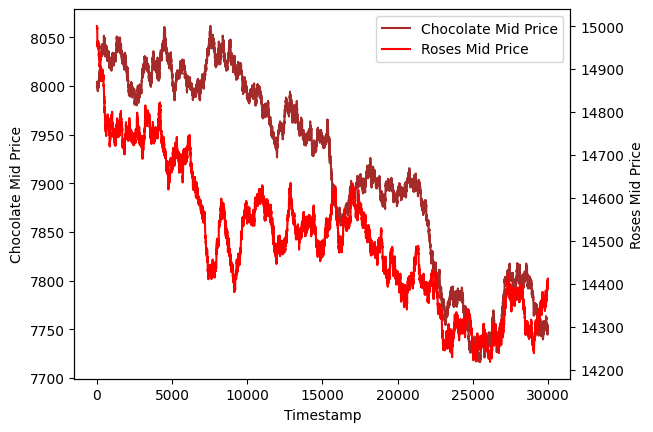

In [258]:
# CHOCOLATE & ROSES
fig, ax1 = plt.subplots()
ax2 = ax1.twinx() 

choc_line = ax1.plot(choc_df["mid_price"], label="Chocolate Mid Price", color="BROWN")
roses_line = ax2.plot(roses_df["mid_price"], label="Roses Mid Price", color="RED")

ax1.set_xlabel("Timestamp")
ax1.set_ylabel("Chocolate Mid Price")
ax2.set_ylabel("Roses Mid Price")

lns = choc_line + roses_line
labs = [l.get_label() for l in lns]
plt.legend(lns, labs, loc="best")
plt.show()

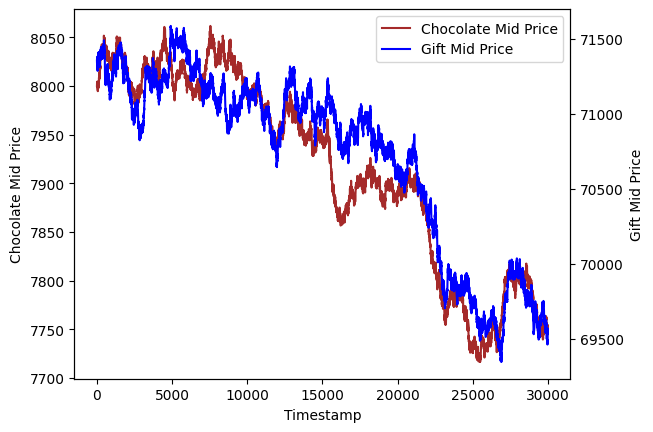

In [259]:
# CHOCOLATE & GIFTS
fig, ax1 = plt.subplots()
ax2 = ax1.twinx() 

choc_line = ax1.plot(choc_df["mid_price"], label="Chocolate Mid Price", color="BROWN")
gift_line = ax2.plot(gift_df["mid_price"], label="Gift Mid Price", color="BLUE")

ax1.set_xlabel("Timestamp")
ax1.set_ylabel("Chocolate Mid Price")
ax2.set_ylabel("Gift Mid Price")

lns = choc_line + gift_line
labs = [l.get_label() for l in lns]
plt.legend(lns, labs, loc="best")
plt.show()

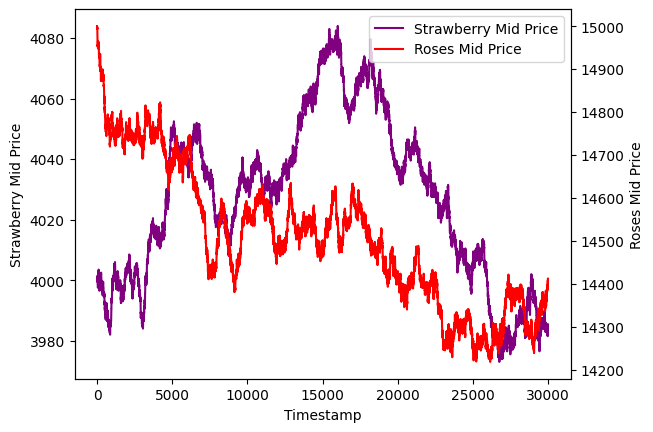

In [260]:
# STRAWBERRIES & ROSES
fig, ax1 = plt.subplots()
ax2 = ax1.twinx() 

strawberry_line = ax1.plot(strawberry_df["mid_price"], label="Strawberry Mid Price", color="PURPLE")
roses_line = ax2.plot(roses_df["mid_price"], label="Roses Mid Price", color="RED")

ax1.set_xlabel("Timestamp")
ax1.set_ylabel("Strawberry Mid Price")
ax2.set_ylabel("Roses Mid Price")

lns = strawberry_line + roses_line
labs = [l.get_label() for l in lns]
plt.legend(lns, labs, loc="best")
plt.show()

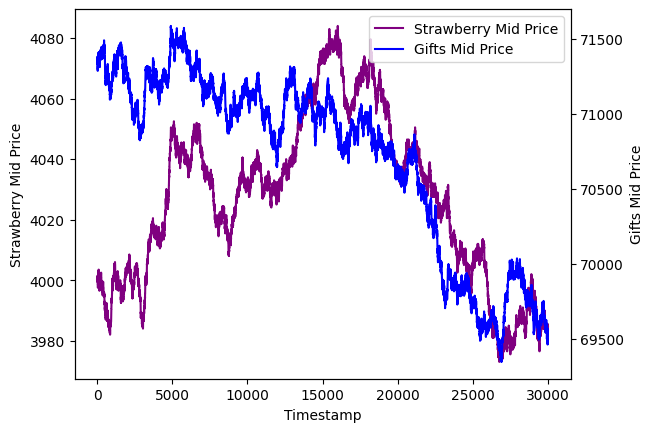

In [261]:
# STRAWBERRIES & GIFTS
fig, ax1 = plt.subplots()
ax2 = ax1.twinx() 

strawberry_line = ax1.plot(strawberry_df["mid_price"], label="Strawberry Mid Price", color="PURPLE")
gifts_line = ax2.plot(gift_df["mid_price"], label="Gifts Mid Price", color="BLUE")

ax1.set_xlabel("Timestamp")
ax1.set_ylabel("Strawberry Mid Price")
ax2.set_ylabel("Gifts Mid Price")

lns = strawberry_line + gifts_line
labs = [l.get_label() for l in lns]
plt.legend(lns, labs, loc="best")
plt.show()

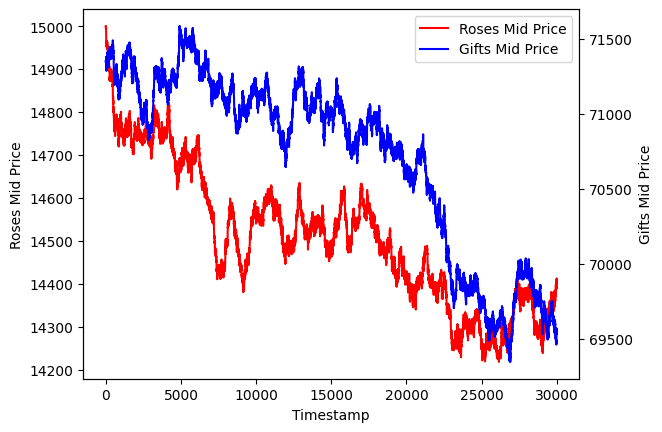

In [262]:
# STRAWBERRIES & GIFTS
fig, ax1 = plt.subplots()
ax2 = ax1.twinx() 

roses_line = ax1.plot(roses_df["mid_price"], label="Roses Mid Price", color="RED")
gifts_line = ax2.plot(gift_df["mid_price"], label="Gifts Mid Price", color="BLUE")

ax1.set_xlabel("Timestamp")
ax1.set_ylabel("Roses Mid Price")
ax2.set_ylabel("Gifts Mid Price")

lns = roses_line + gifts_line
labs = [l.get_label() for l in lns]
plt.legend(lns, labs, loc="best")
plt.show()